In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [108]:
df = pd.read_csv('weather_data.csv')

In [109]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [110]:
df.rename(columns={
    'Date/Time': 'Datetime',
    'Temp_C': 'Temperature',
    'Dew Point Temp_C': 'DewPointTemp',
    'Rel Hum_%': 'Humidity',
    'Wind Speed_km/h': 'WindSpeed',
    'Visibility_km': 'Visibility',
    'Press_kPa': 'Pressure',
    'Weather': 'WeatherCondition'
}, inplace=True)

In [111]:
df.head()

,Datetime,Temperature,DewPointTemp,Humidity,WindSpeed,Visibility,Pressure,WeatherCondition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [112]:
#check for null values
df.isnull().sum()

Datetime            0
Temperature         0
DewPointTemp        0
Humidity            0
WindSpeed           0
Visibility          0
Pressure            0
WeatherCondition    0
dtype: int64

In [113]:
label_encoder = LabelEncoder()
df['WeatherCondition_encoded'] = label_encoder.fit_transform(df['WeatherCondition'])

In [114]:
df.head()

,Datetime,Temperature,DewPointTemp,Humidity,WindSpeed,Visibility,Pressure,WeatherCondition,WeatherCondition_encoded
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,7
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,7
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",9
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",9
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,7


In [115]:
features = ['Temperature','DewPointTemp','Visibility','Pressure']
target = 'WeatherCondition_encoded'

In [116]:
X = df[features]
y = df[target]

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [119]:
model = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [120]:
tree_rules = export_text(model, feature_names=features)
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- Visibility <= -2.12
|   |--- Pressure <= 0.80
|   |   |--- DewPointTemp <= -0.84
|   |   |   |--- DewPointTemp <= -0.88
|   |   |   |   |--- class: 21
|   |   |   |--- DewPointTemp >  -0.88
|   |   |   |   |--- Visibility <= -2.14
|   |   |   |   |   |--- class: 39
|   |   |   |   |--- Visibility >  -2.14
|   |   |   |   |   |--- class: 21
|   |   |--- DewPointTemp >  -0.84
|   |   |   |--- Temperature <= -1.21
|   |   |   |   |--- class: 22
|   |   |   |--- Temperature >  -1.21
|   |   |   |   |--- Temperature <= -0.94
|   |   |   |   |   |--- class: 39
|   |   |   |   |--- Temperature >  -0.94
|   |   |   |   |   |--- DewPointTemp <= -0.32
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- DewPointTemp >  -0.32
|   |   |   |   |   |   |--- class: 7
|   |--- Pressure >  0.80
|   |   |--- DewPointTemp <= -0.24
|   |   |   |--- class: 12
|   |   |--- DewPointTemp >  -0.24
|   |   |   |--- DewPointTemp <= -0.21
|   |   |   |   |--- class: 7
|   |   

In [121]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy: {:.2f}%".format(train_accuracy * 100))


Training Accuracy: 99.99%


In [122]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

Testing Accuracy: 43.94%


Training Accuracy: 99.99%
Test Accuracy: 43.71%


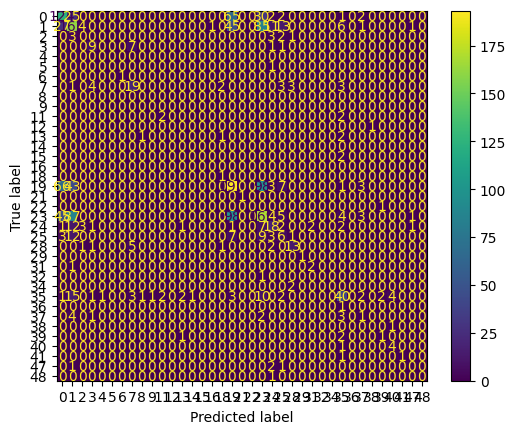

In [125]:

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(
    max_depth=None,  # Fully grow the tree
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluation
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Confusion Matrix
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)